# Experimentation with different numbers of trial utterances
## ASV evaluation with the anonymized audiofiles by increasing the number of trial utterances
1. The number of trial utterances is gradually increased for both ignorant and lazy-informed scenario
2. We run the experiments multiple times for different target selections (i.e. 5 different files) to avoid bias
3. The speakers with less than the minimum number of utterances are filtered out
4. The number of enrollment utterances is fixed to 20 (but randomly selected to avoid bias)

<b> Hypothesis</b>: The EER of the ASV system will decrease, as the number of trial utterances increases. A greater number of trial data per speaker leads to more robust voice models that efficiently capture the trial speakers' unique voice characteristics, thereby increasing the system's ability to accept or reject the speaker correctly. <br>

The following VC-Models are evaluated:
1. StarGan-VC
2. kNN-VC


The following datasets from LibriSpeech are evaluated:
1. ls-test-clean and ls-test-other
2. ls-train-other-500

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt



/tmp/ipykernel_87870/2862603903.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1. Evaluation with ls-test-clean and ls-test-other (60 out of 73 speakers)
The speakers with less than 50 utterances are filtered out. We run the experiments for 5 different target selections (files).

#### Results for StarGAN-VC model


In [2]:
file_pattern = "results_stargan_trial/ls-test-clean_other/stargan_tco_num_trial#*.txt" 

In [3]:
all_files = glob.glob(file_pattern)


##### Averaging over 5 different target selections


In [4]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [5]:
# Aggregate and calculate overall mean and standard deviation for each number of enroll
overall_stats = full_df.groupby('num_of_trials').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

overall_stats.to_csv('overall_stats/overall_stats_stargan_tco_num_trials.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file
full_df = full_df[(full_df['num_of_trials'] % 5 == 0) | (full_df['num_of_trials'] <= 5)]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})

# Display the overall statistics in a table
print("Overall statistics for test-clean-other:")
display(overall_stats)

Overall statistics for test-clean-other:


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                35.084746  3.139296         23.591467  2.029701
2                34.415546  3.310223         18.703682  2.171832
3                33.111046  3.269172         17.264173  2.459936
4                32.726476  3.350619         16.591467  2.573512
5                32.607247  2.696395         15.949737  1.672339
10               32.073641  3.569860         14.254822  1.905664
15               32.624196  3.326639         12.925190  1.995629
20               32.263589  2.992672         12.855640  2.126425
25               32.198714  3.491656         12.219170  1.216882
30               31.633314  3.159029         11.967668  1.430702

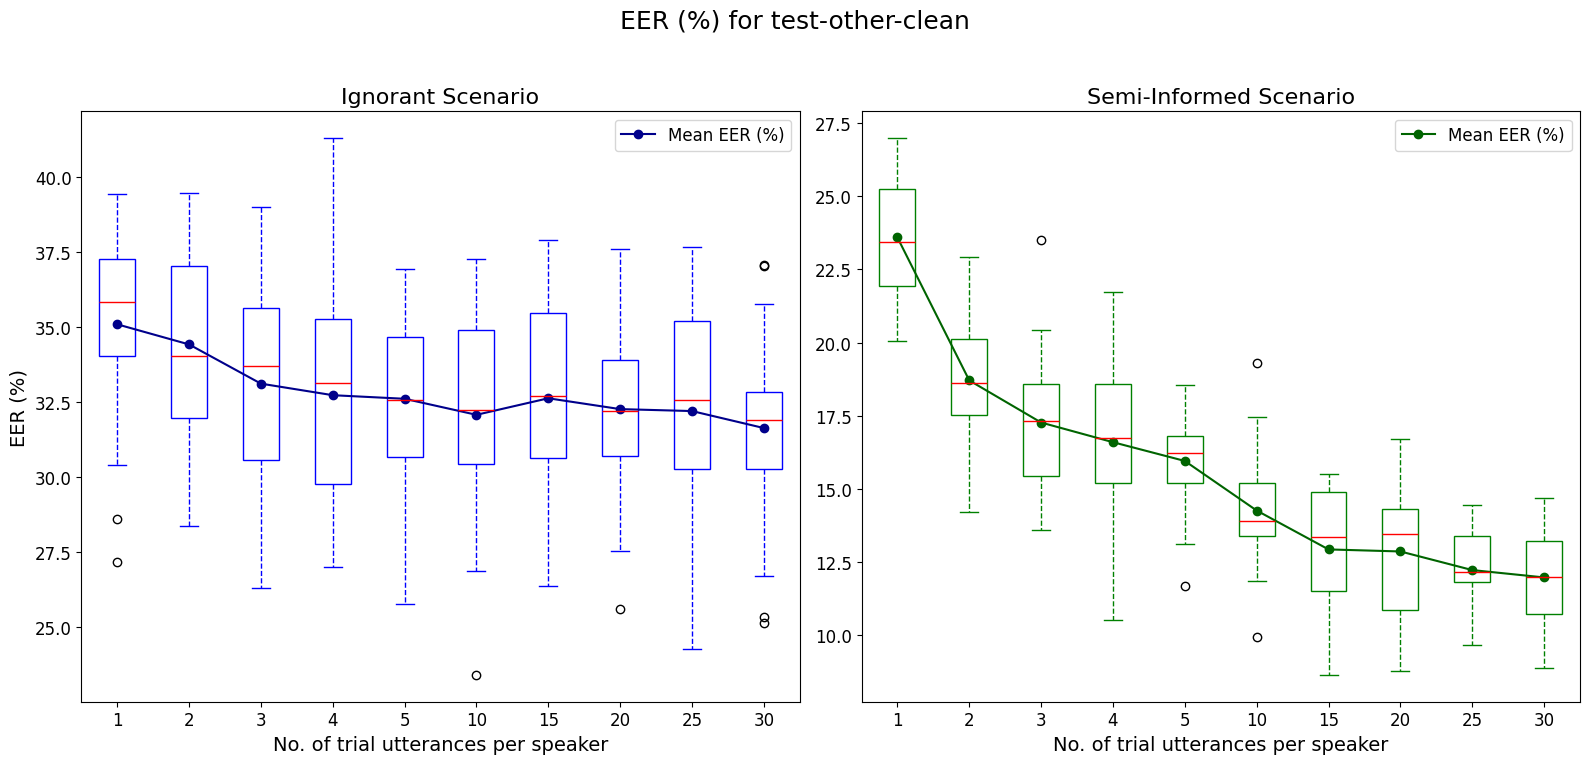

In [7]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('EER (%) for test-other-clean', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_trials')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='blue'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='blue', linestyle='--'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('No. of trial utterances per speaker', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_trials')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='green'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='green', linestyle='--'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Semi-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('No. of trial utterances per speaker', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overall_stats/boxplots/stargan_tco_num_trials.png')
plt.savefig('overall_stats/boxplots/stargan_tco_num_trials.pdf')  
plt.show()

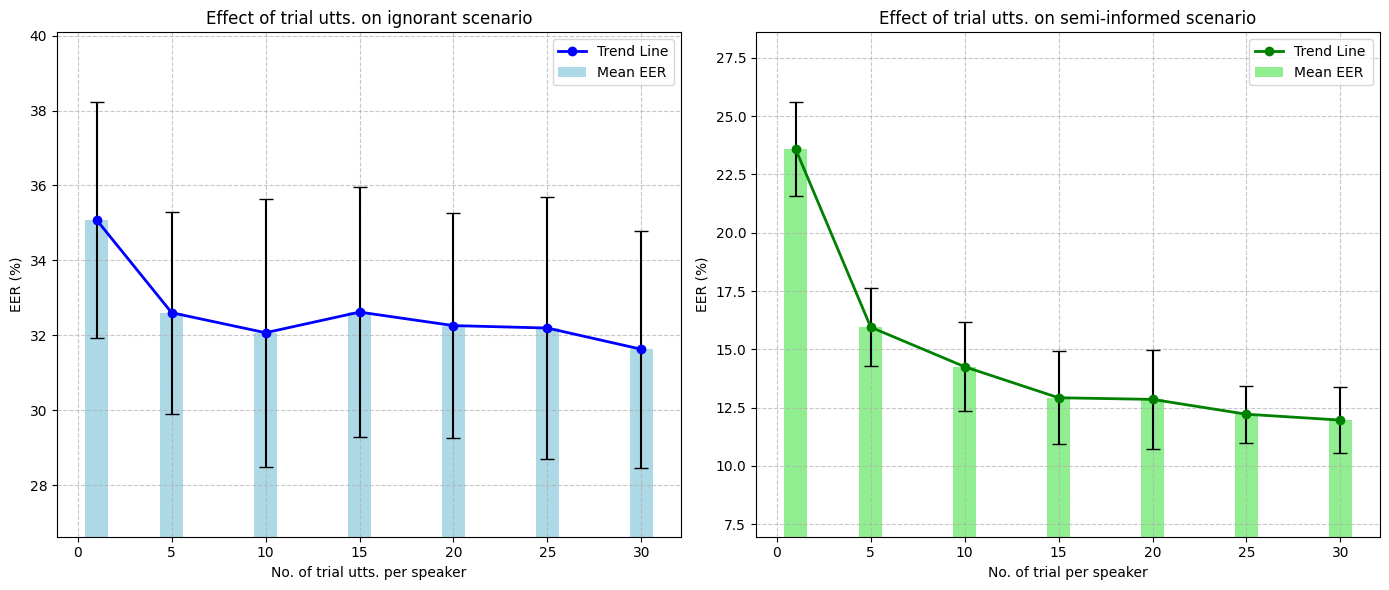

In [9]:
full_df = full_df[(full_df['num_of_trials'] % 5 == 0) | (full_df['num_of_trials'] == 1)]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for eer_ignorant
axs[0].bar(overall_stats.index, overall_stats['eer_ignorant']['mean'], yerr=overall_stats['eer_ignorant']['std'], capsize=5, color='lightblue', width=1.2, label='Mean EER')
axs[0].plot(overall_stats.index, overall_stats['eer_ignorant']['mean'], marker='o', color='blue', linestyle='-', linewidth=2, label='Trend Line')
axs[0].set_title('Effect of trial utts. on ignorant scenario')
axs[0].set_xlabel('No. of trial utts. per speaker')
axs[0].set_ylabel('EER (%)')
axs[0].set_ylim(min(overall_stats['eer_ignorant']['mean']) - 5, max(overall_stats['eer_ignorant']['mean']) + 5)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# Bar chart for eer_lazy-informed
axs[1].bar(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], yerr=overall_stats['eer_lazy-informed']['std'], capsize=5, color='lightgreen', width=1.2, label='Mean EER ')
axs[1].plot(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], marker='o', color='green', linestyle='-', linewidth=2, label='Trend Line')
axs[1].set_title('Effect of trial utts. on semi-informed scenario')
axs[1].set_xlabel('No. of trial per speaker')
axs[1].set_ylabel('EER (%)')
axs[1].set_ylim(min(overall_stats['eer_lazy-informed']['mean']) -5, max(overall_stats['eer_lazy-informed']['mean']) + 5)

axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.savefig('overall_stats/bar_charts/stargan_tco_trials.png')
plt.savefig('overall_stats/bar_charts/stargan_tco_trials.pdf')  

plt.tight_layout()
plt.show()

### (b) Results kNN-VC

In [10]:
file_pattern = "results_knnvc_trial/ls-test-clean_other/knnvc_tco_num_trial#*.txt" 

In [11]:
all_files = glob.glob(file_pattern)

In [12]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    all_dfs.append(df)

full_df2 = pd.concat(all_dfs, ignore_index=True)


In [14]:
# Aggregate and calculate overall mean and standard deviation for each number of enroll
overall_stats = full_df.groupby('num_of_trials').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

overall_stats.to_csv('overall_stats/overall_stats_knnvc_tco_num_trials.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file
full_df = full_df[(full_df['num_of_trials'] % 5 == 0) | (full_df['num_of_trials'] <= 5)]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})

# Display the overall statistics in a table
print("Overall statistics for test-clean-other:")
display(overall_stats)

Overall statistics for test-clean-other:


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                35.084746  3.139296         23.591467  2.029701
5                32.607247  2.696395         15.949737  1.672339
10               32.073641  3.569860         14.254822  1.905664
15               32.624196  3.326639         12.925190  1.995629
20               32.263589  2.992672         12.855640  2.126425
25               32.198714  3.491656         12.219170  1.216882
30               31.633314  3.159029         11.967668  1.430702

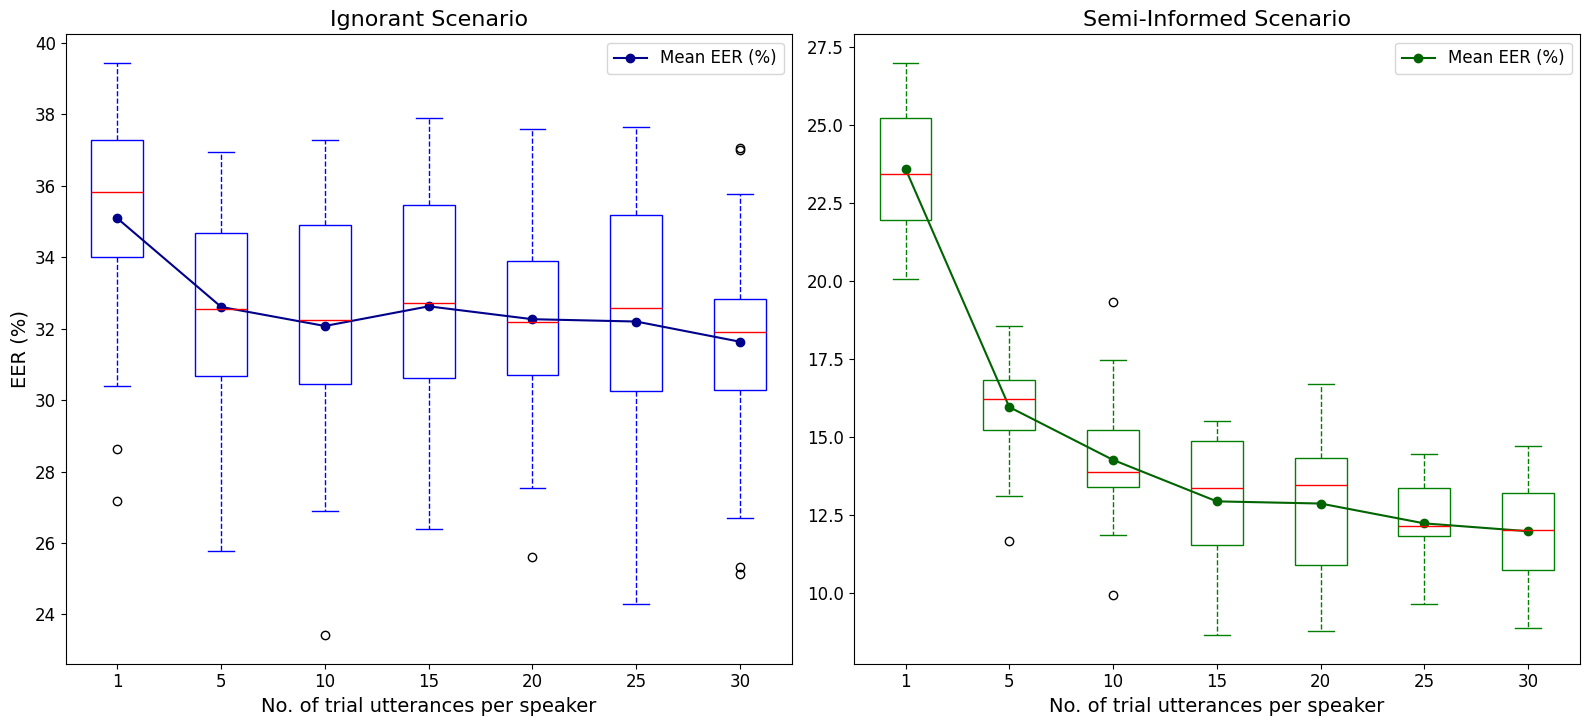

In [16]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# # Customizing the overall appearance
# plt.suptitle('EER (%) for test-other-clean', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_trials')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='blue'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='blue', linestyle='--'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('No. of trial utterances per speaker', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_trials')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='green'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='green', linestyle='--'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Semi-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('No. of trial utterances per speaker', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overall_stats/boxplots/knnvc_tco_trials.png')
plt.savefig('overall_stats/boxplots/knnvc_tco_trials.pdf')  
plt.show()

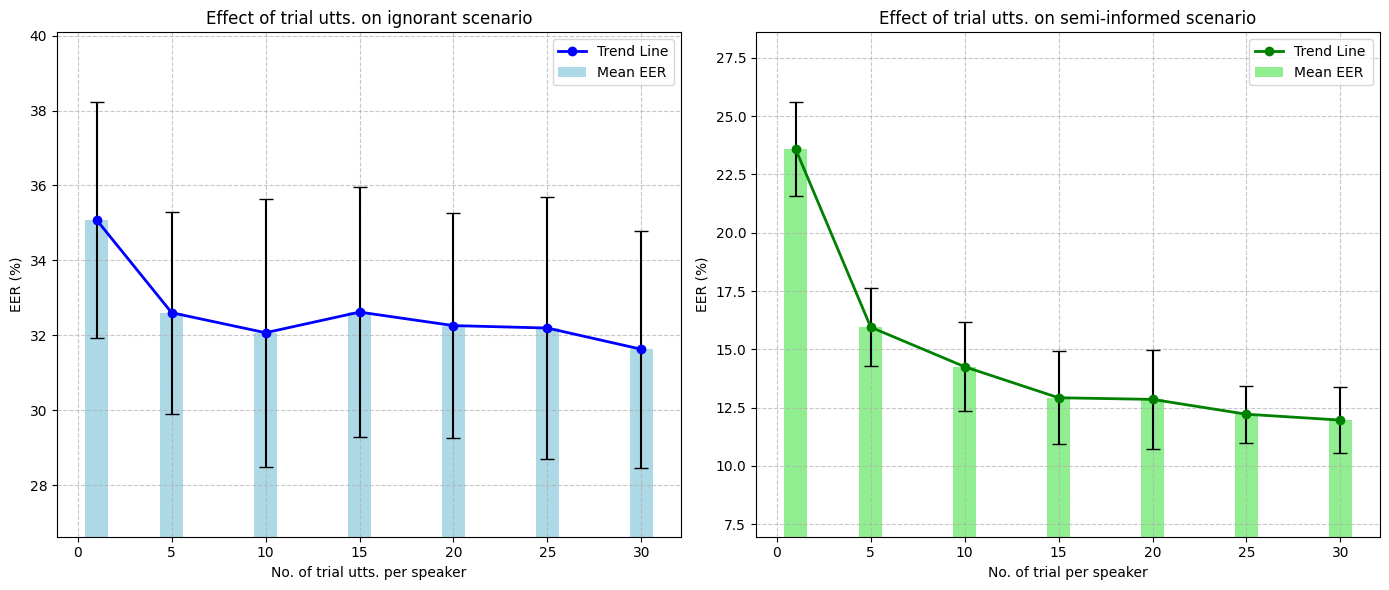

In [17]:
full_df = full_df[(full_df['num_of_trials'] % 5 == 0) | (full_df['num_of_trials'] == 1)]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for eer_ignorant
axs[0].bar(overall_stats.index, overall_stats['eer_ignorant']['mean'], yerr=overall_stats['eer_ignorant']['std'], capsize=5, color='lightblue', width=1.2, label='Mean EER')
axs[0].plot(overall_stats.index, overall_stats['eer_ignorant']['mean'], marker='o', color='blue', linestyle='-', linewidth=2, label='Trend Line')
axs[0].set_title('Effect of trial utts. on ignorant scenario')
axs[0].set_xlabel('No. of trial utts. per speaker')
axs[0].set_ylabel('EER (%)')
axs[0].set_ylim(min(overall_stats['eer_ignorant']['mean']) - 5, max(overall_stats['eer_ignorant']['mean']) + 5)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# Bar chart for eer_lazy-informed
axs[1].bar(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], yerr=overall_stats['eer_lazy-informed']['std'], capsize=5, color='lightgreen', width=1.2, label='Mean EER ')
axs[1].plot(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], marker='o', color='green', linestyle='-', linewidth=2, label='Trend Line')
axs[1].set_title('Effect of trial utts. on semi-informed scenario')
axs[1].set_xlabel('No. of trial per speaker')
axs[1].set_ylabel('EER (%)')
axs[1].set_ylim(min(overall_stats['eer_lazy-informed']['mean']) -5, max(overall_stats['eer_lazy-informed']['mean']) + 5)

axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.savefig('overall_stats/bar_charts/knnvc_tco_trials.png')
plt.savefig('overall_stats/bar_charts/knnvc_tco_trials.pdf')  

plt.tight_layout()
plt.show()

### 2. Evaluation with ls-train-other-500 (795 from the 1166 speakers)
The speakers with less than 120 utterances are filtered out from the dataset

### a) Results for StarGAN-VC

In [18]:
file_pattern = "results_stargan_trial/ls-train-other-500/stargan_to500_num_trial#*.txt" 

In [19]:
all_files = glob.glob(file_pattern)

Averaging over 5 different target selections

In [20]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [21]:
# Incrementing by 1 till 10, and by 5 thereafter
condition = (
    (full_df['num_of_trials'] <= 5) |  # Includes all numbers from 1 to 10
    (full_df['num_of_trials'] % 5 == 0)  # Includes multiples of 5
)

# Apply the condition to filter the DataFrame
full_df = full_df[condition]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})
overall_stats.to_csv('overall_stats/overall_stats_stargan_tco500_num_trials.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

# Display the resulting statistics
display(overall_stats)


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                27.726514  0.760608         15.053059  0.649183
2                26.742441  0.799052         11.455592  0.513738
3                26.460411  0.784811         10.305806  0.604577
4                26.227682  0.768069          9.364404  0.649001
5                26.252490  0.733880          8.853275  0.535180
10               26.066867  0.825280          8.118391  0.520861
15               25.956474  0.740384          7.746100  0.396183
20               25.867382  0.748913          7.583366  0.478214
25               25.827172  0.745221          7.589062  0.485855
30               25.914389  0.762664          7.359141  0.499408
35               25.869164  0.722916          7.382636  0.407293
40               25.612377  0.725837          7.405767  0.462803
45               25.874282  0.668112          7.237554  0.503750
50               25.718354  0.709204          7.392345  0.512642

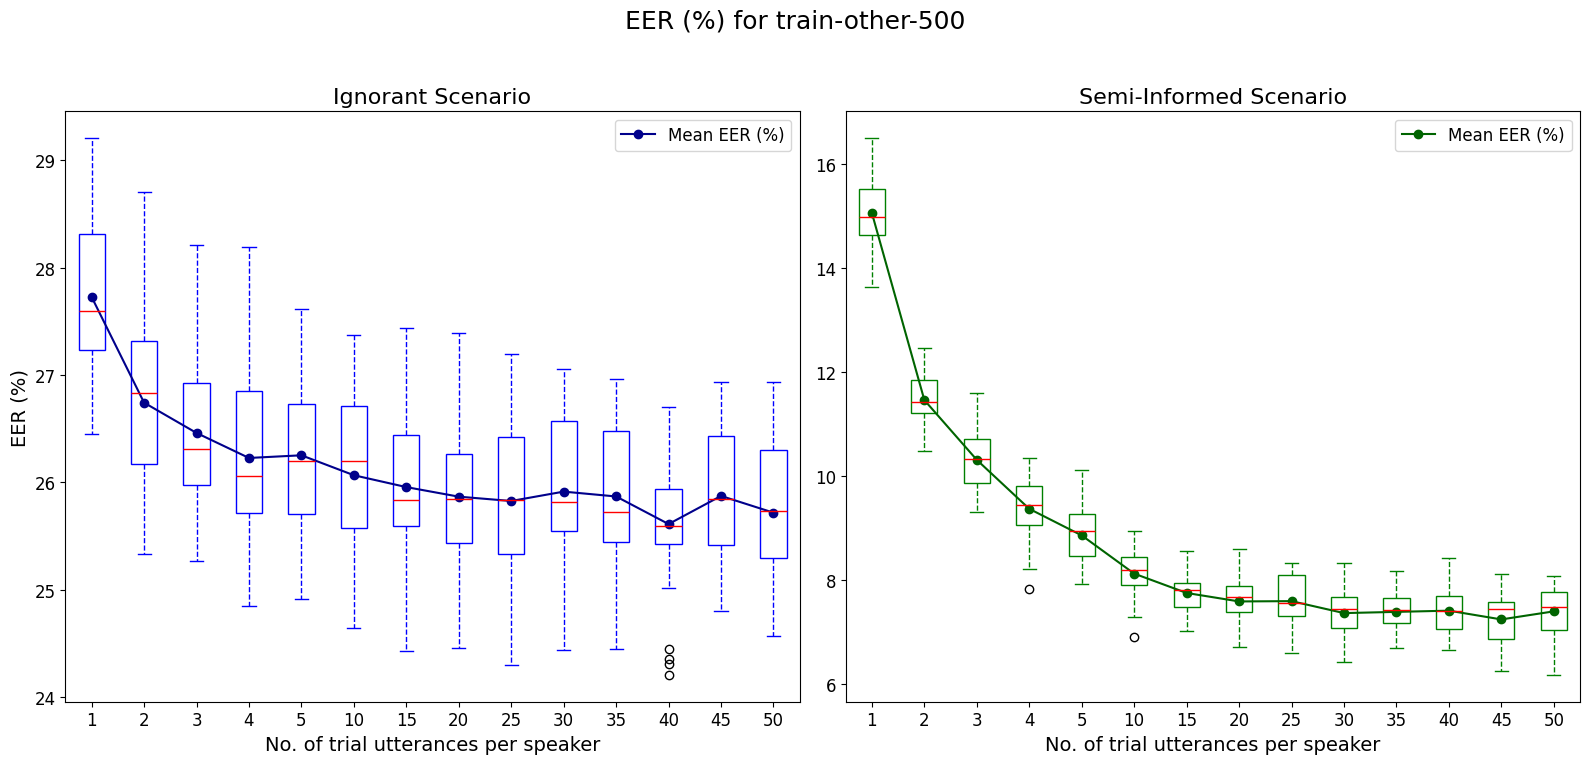

In [23]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('EER (%) for train-other-500', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_trials')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='blue'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='blue', linestyle='--'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('No. of trial utterances per speaker', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_trials')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='green'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='green', linestyle='--'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Semi-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('No. of trial utterances per speaker', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overall_stats/stargan_to500_num_trials.png')
plt.savefig('overall_stats/stargan_to500_num_trials.pdf')  
plt.show()

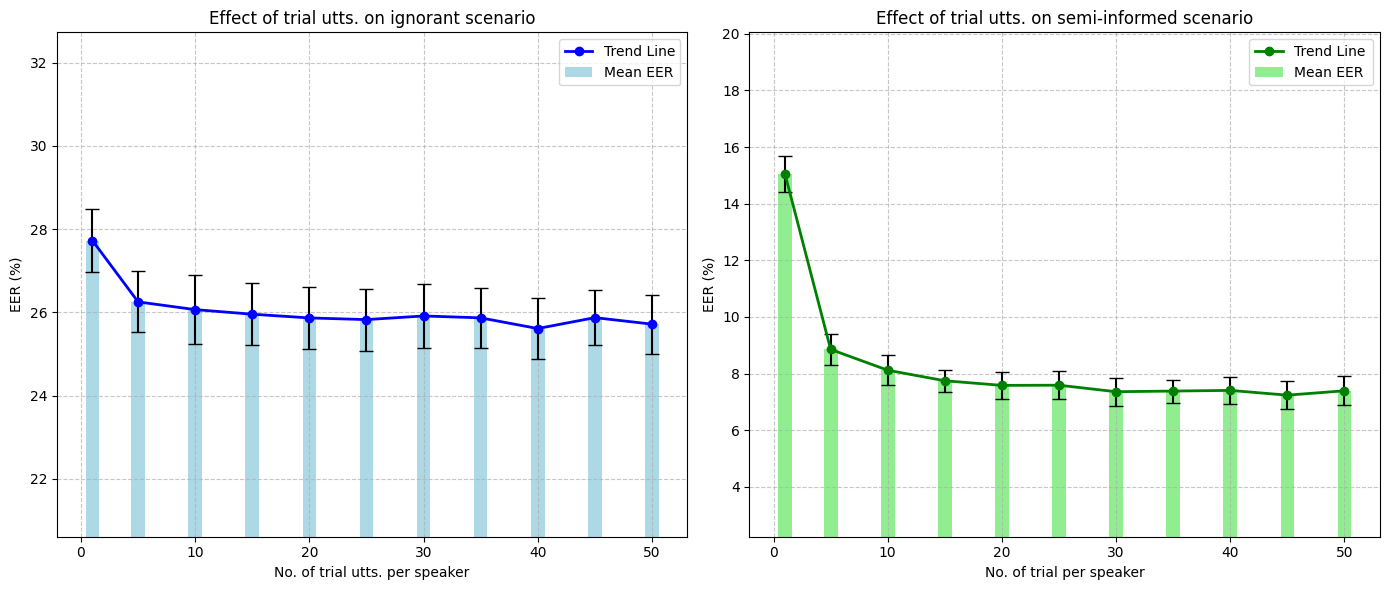

In [24]:
full_df = full_df[(full_df['num_of_trials'] % 5 == 0) | (full_df['num_of_trials'] == 1)]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for eer_ignorant
axs[0].bar(overall_stats.index, overall_stats['eer_ignorant']['mean'], yerr=overall_stats['eer_ignorant']['std'], capsize=5, color='lightblue', width=1.2, label='Mean EER')
axs[0].plot(overall_stats.index, overall_stats['eer_ignorant']['mean'], marker='o', color='blue', linestyle='-', linewidth=2, label='Trend Line')
axs[0].set_title('Effect of trial utts. on ignorant scenario')
axs[0].set_xlabel('No. of trial utts. per speaker')
axs[0].set_ylabel('EER (%)')
axs[0].set_ylim(min(overall_stats['eer_ignorant']['mean']) - 5, max(overall_stats['eer_ignorant']['mean']) + 5)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# Bar chart for eer_lazy-informed
axs[1].bar(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], yerr=overall_stats['eer_lazy-informed']['std'], capsize=5, color='lightgreen', width=1.2, label='Mean EER ')
axs[1].plot(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], marker='o', color='green', linestyle='-', linewidth=2, label='Trend Line')
axs[1].set_title('Effect of trial utts. on semi-informed scenario')
axs[1].set_xlabel('No. of trial per speaker')
axs[1].set_ylabel('EER (%)')
axs[1].set_ylim(min(overall_stats['eer_lazy-informed']['mean']) -5, max(overall_stats['eer_lazy-informed']['mean']) + 5)

axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.savefig('overall_stats/bar_charts/stargan_to500_trials.png')
plt.savefig('overall_stats/bar_charts/stargan_to500_trials.pdf')  

plt.tight_layout()
plt.show()

### b) Results with kNN-VC model


In [25]:
file_pattern = "results_knnvc_trial/ls-train-other-500/knnvc_to500_num_trial#*.txt" 

In [26]:
all_files = glob.glob(file_pattern)

Aggregate over all the EErs

In [27]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)

In [28]:
# Incrementing by 1 till 10, and by 5 thereafter
condition = (
    (full_df['num_of_trials'] <= 5) |  # Includes all numbers from 1 to 10
    (full_df['num_of_trials'] % 5 == 0)  # Includes multiples of 5
)

# Apply the condition to filter the DataFrame
full_df = full_df[condition]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})
overall_stats.to_csv('overall_stats/overall_stats_knnvc_to500_num_trials.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

# Display the resulting statistics
display(overall_stats)


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                40.258350  0.491164          4.697276  0.364280
2                40.264992  0.597956          2.178902  0.279239
3                40.030414  0.634684          1.561875  0.172263
4                40.206632  0.599802          1.310561  0.162282
5                40.120144  0.463248          1.158928  0.165469
10               39.992980  0.530155          0.864688  0.151812
15               39.958608  0.604812          0.714133  0.115045
20               40.043186  0.539608          0.706119  0.108740
25               40.001264  0.427671          0.683264  0.074988
30               39.945610  0.447495          0.651195  0.067072
35               39.804861  0.455025          0.691110  0.091886
40               39.910540  0.461718          0.678563  0.107898
45               39.958725  0.333456          0.625251  0.084110
50               39.883111  0.387409          0.645648  0.099967

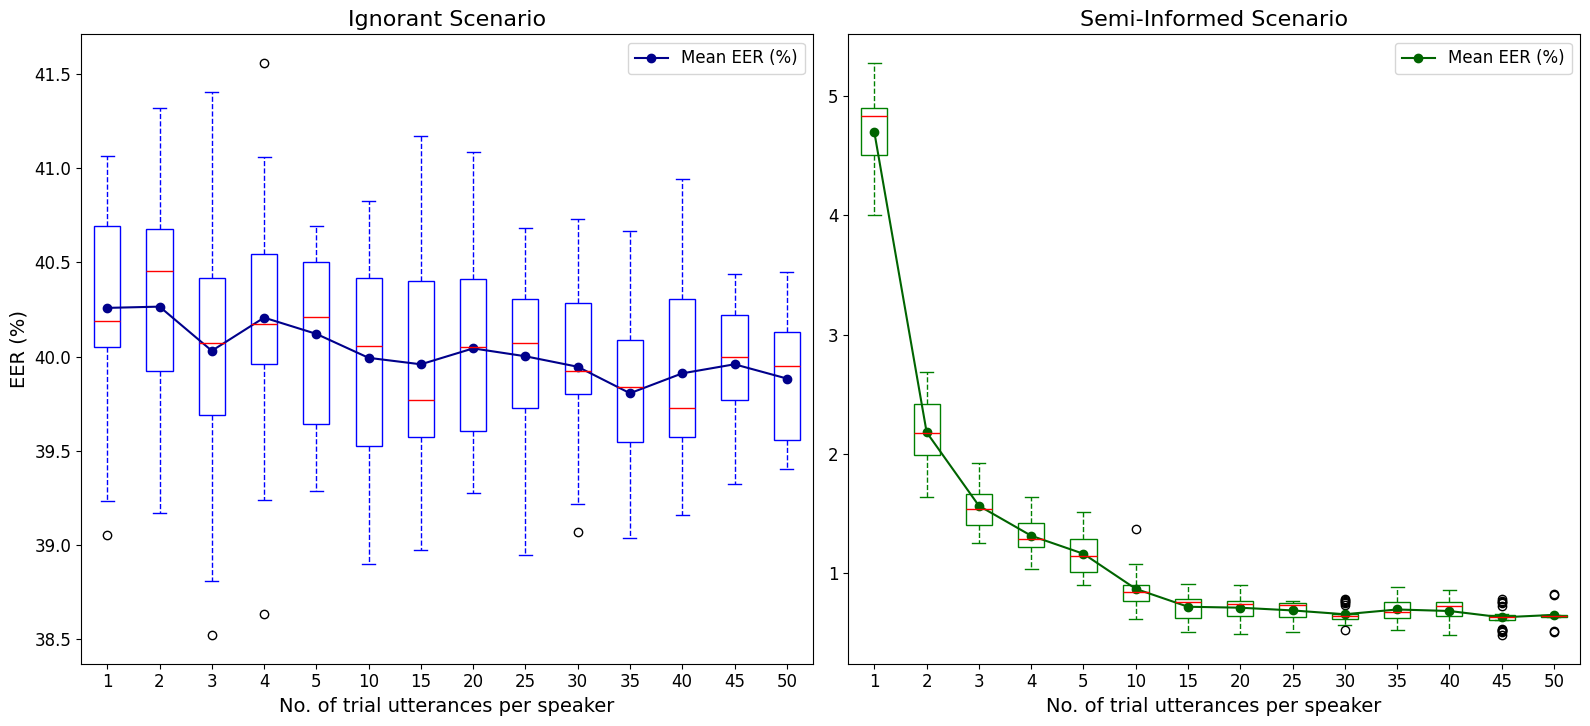

In [30]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# # Customizing the overall appearance
# plt.suptitle('EER (%) for train-other-500', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_trials')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='blue'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='blue', linestyle='--'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('No. of trial utterances per speaker', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_trials')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='green'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='green', linestyle='--'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Semi-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('No. of trial utterances per speaker', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overall_stats/knnvc_to500_num_trials.png')
plt.savefig('overall_stats/knnvc_to500_num_trials.pdf')  
plt.show()

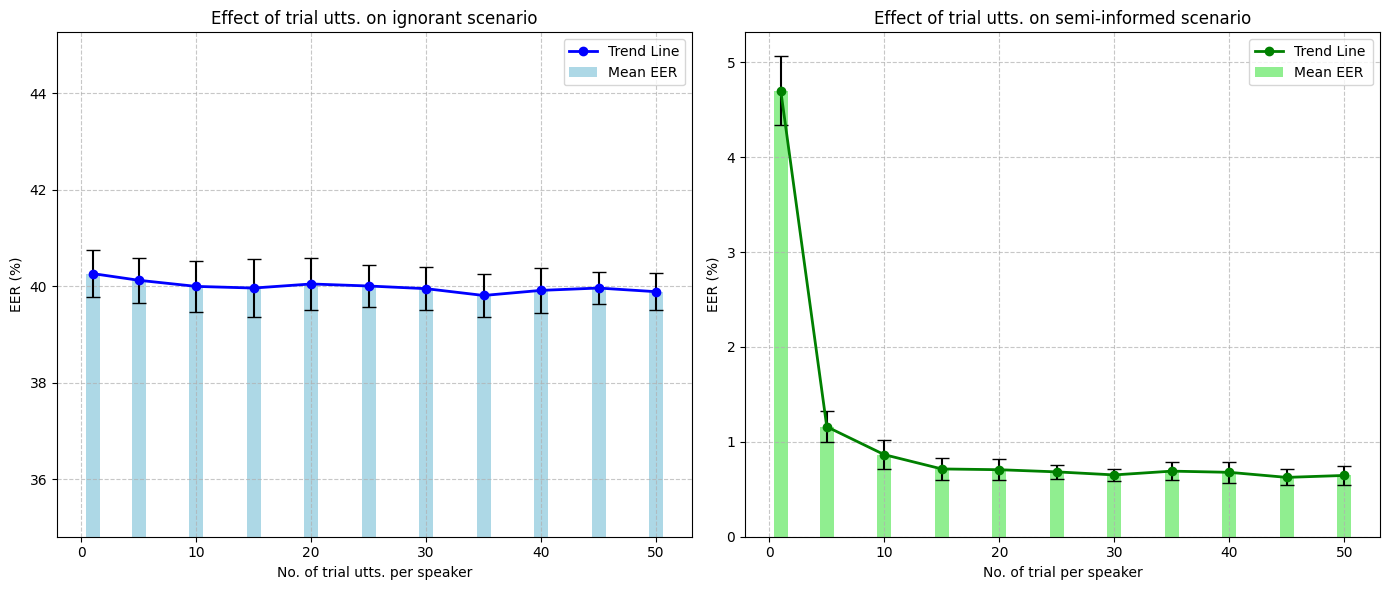

In [33]:
full_df = full_df[(full_df['num_of_trials'] % 5 == 0) | (full_df['num_of_trials'] == 1)]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for eer_ignorant
axs[0].bar(overall_stats.index, overall_stats['eer_ignorant']['mean'], yerr=overall_stats['eer_ignorant']['std'], capsize=5, color='lightblue', width=1.2, label='Mean EER')
axs[0].plot(overall_stats.index, overall_stats['eer_ignorant']['mean'], marker='o', color='blue', linestyle='-', linewidth=2, label='Trend Line')
axs[0].set_title('Effect of trial utts. on ignorant scenario')
axs[0].set_xlabel('No. of trial utts. per speaker')
axs[0].set_ylabel('EER (%)')
axs[0].set_ylim(min(overall_stats['eer_ignorant']['mean']) - 5, max(overall_stats['eer_ignorant']['mean']) + 5)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# Bar chart for eer_lazy-informed
axs[1].bar(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], yerr=overall_stats['eer_lazy-informed']['std'], capsize=5, color='lightgreen', width=1.2, label='Mean EER ')
axs[1].plot(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], marker='o', color='green', linestyle='-', linewidth=2, label='Trend Line')
axs[1].set_title('Effect of trial utts. on semi-informed scenario')
axs[1].set_xlabel('No. of trial per speaker')
axs[1].set_ylabel('EER (%)')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.savefig('overall_stats/bar_charts/stargan_to500_trials.png')
plt.savefig('overall_stats/bar_charts/stargan_to500_trials.pdf')  

plt.tight_layout()
plt.show()